### PREDICTION USING SUPERVISED ML

We aim to predict the percentage of the student based on their number of study hours

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("student_info.csv")
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [ ]:
#showing the initial 10 data items
df.head(10)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
5,7.55,81.18
6,6.67,76.99
7,8.99,85.46
8,5.19,70.66
9,6.75,77.82


In [ ]:
#showing the last 10 data items
df.tail(10)

,study_hours,student_marks
190,5.79,73.14
191,5.22,70.51
192,8.71,84.03
193,7.55,79.64
194,6.35,74.24
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


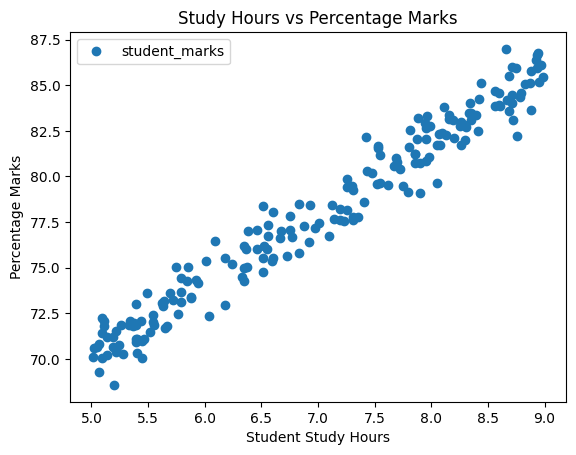

In [ ]:
df.plot(x="study_hours", y="student_marks", style = "o")
plt.title('Study Hours vs Percentage Marks')
plt.xlabel('Student Study Hours')
plt.ylabel('Percentage Marks')
plt.show()

By observing the plotted graph above, we can understand that there is a linearly increasing dependence of marks on the study hours.

As the student study spends more time studying , the marks of the student also increases.

In [ ]:
#checking the information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
# checking important numerical metrics of the dataset

df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [ ]:
df["student_marks"] = df["student_marks"].fillna(df["student_marks"].mean())
df["study_hours"] = df["study_hours"].fillna(df["study_hours"].mean())

In [ ]:
# making the attributes for testing and training data

# x = Independent Varaible = Study Hours
# y = Dependent Variable = Percentage Marks

from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=56)

In [ ]:
print(X.shape)
print(y.shape)

(200, 1)
(200,)


### Train the Algorithm

We will be selecting the linear regression algorithm and training on that

In [ ]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train, y_train)

print("Training complete.")


Training complete.


In [ ]:
linReg.coef_

# this is value of the slope

array([3.88465828])

In [ ]:
y_pred = linReg.predict(x_test) # Predicting the scores

y_pred[:5]

array([72.64064305, 75.43759701, 73.61180762, 70.93139341, 75.35990385])

In [ ]:
print('Test Score')
print(linReg.score(X_test, y_test))
print('Training Score')
print(linReg.score(X_train, y_train))

Test Score
0.9627570903335334
Training Score
0.9564148211360541


In [ ]:
y_pred

array([72.64064305, 75.43759701, 73.61180762, 70.93139341, 75.35990385,
       82.58536825, 72.79602938, 73.49526787, 71.6306319 , 79.12802238,
       70.97023999, 84.02269182, 79.55533479, 81.61420368, 80.09918695,
       73.84488712, 73.14564863, 82.35228875, 85.07154955, 73.10680204,
       74.1168132 , 85.69309488, 71.70832506, 70.62062074, 82.4688285 ,
       77.06915349, 79.16686896, 78.70070997, 71.70832506, 72.29102381,
       75.0102846 , 79.9826472 , 78.50647706, 73.26218838, 82.04151609,
       79.32225529, 77.94688705, 74.42758586, 84.87731664, 83.05152724])

In [ ]:
#Creating a DataFrame for easy analysis
#concatenating the test and pred value.
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["study_hours","org_Percentage","pred_Percentage"])

,study_hours,org_Percentage,pred_Percentage
0,5.630000,71.79,72.640643
1,6.350000,71.10,75.437597
2,5.880000,76.63,73.611808
3,5.190000,70.79,70.931393
4,6.330000,85.10,75.359904
5,8.190000,85.11,82.585368
6,5.670000,73.08,72.796029
7,5.850000,72.96,73.495268
8,5.370000,74.24,71.630632
9,7.300000,83.91,79.128022


In [ ]:
#Let's predict the score for 9.25 hours
print('Predicted percentage of a student who studied 9.25hours/day is:', linReg.predict([[9.25]]))

Predicted percentage of a student who studied 9.25hours/day is: [86.70310603]


### Some Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mean_squ_error = mean_squared_error(y_test, y_pred)
mean_abs_error = mean_absolute_error(y_test, y_pred)
print("The MSE is:",mean_squ_error)
print("The MAE is:",mean_abs_error)

The MSE is: 42.27953079251101
The MAE is: 5.192288546271809
